### 这个文件用于预处理数据

In [1]:
import pandas as pd
from pandas import read_parquet
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
fits_path = "/data/renhaoye/decals_2022/in_decals/fits"    # 原始fits文件保存位置
fits_list = os.listdir(fits_path)   # 获取fits文件列表
threshold = 0.5 # 之后设置分割时候的阈值
poi_list = [] # 获取最后的ra，dec列表名(小数点后六位)
for i in range(len(fits_list)):
    poi_list.append([float(fits_list[i].split("_")[0]), float(fits_list[i].split("_")[1].split(".fits")[0])])
poi_list = pd.DataFrame(poi_list, columns=["ra", "dec"])

auto_catalog_path = "/data/renhaoye/decals_2022/gz_decals_auto_posteriors.parquet"   # auto列表的位置
df_auto = read_parquet(auto_catalog_path).rename(columns=lambda x: x.replace("-", "_")) # 头中的-换为_
# auto列表中的ra和dec保留小数点后六位
resolution = 6
df_auto.ra = df_auto.ra.map(lambda x: float(str(x).split(".")[0] + "." + str(x).split(".")[1][:resolution]))
df_auto.dec = df_auto.dec.map(lambda x: float(str(x).split(".")[0] + "." + str(x).split(".")[1][:resolution]))

# 列表匹配
df_auto = pd.merge(poi_list, df_auto, how="inner")

In [25]:
df_auto.to_csv("/data/renhaoye/decals_2022/fits.csv")

In [3]:
def download(ra: float, dec: float):
    save_dir = "/data/renhaoye/decals_2022/png/%f_%f.jpg"  % (ra, dec)
    control = "https://www.legacysurvey.org/viewer/jpeg-cutout?ra=%f&dec=%f&layer=dr8&pixscale=0.262&bands=grz'" % (ra, dec)
    url = "wget '" + control + " -q -O " + save_dir
    # os.system(url)
    print(url)

In [4]:
from tqdm import tqdm
# for i in range(len(df_auto)):
# for i in range(1):
#     download(df_auto.iloc[i, 0], df_auto.iloc[i, 1])    # 0是ra，1是dec

In [4]:
merger = major = df_auto.query('merging_minor_disturbance_fraction > %f '
                               '| merging_major_disturbance_fraction > %f '
                               '| merging_merger_fraction > %f '
                               % (threshold, threshold, threshold))
len(merger)

7231

In [6]:
smoothRounded = df_auto.query('smooth_or_featured_smooth_fraction >  %f '
                       '& how_rounded_round_fraction > %f' % (threshold, 0.8))
smoothRounded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38044 entries, 17 to 313381
Data columns (total 91 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ra                                                 38044 non-null  float64
 1   dec                                                38044 non-null  float64
 2   iauname                                            38044 non-null  object 
 3   petro_theta                                        38044 non-null  float32
 4   petro_th50                                         38044 non-null  float32
 5   petro_th90                                         38044 non-null  float32
 6   elpetro_absmag_r                                   38044 non-null  float32
 7   sersic_nmgy_r                                      38044 non-null  float32
 8   redshift                                           38044 non-null  float32
 9   mag_

In [7]:
smoothRounded1 = df_auto.query('smooth_or_featured_smooth_fraction >  %f '
                       '& how_rounded_in_between_fraction > %f' % (threshold, threshold))
smoothRounded1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113773 entries, 0 to 313379
Data columns (total 91 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   ra                                                 113773 non-null  float64
 1   dec                                                113773 non-null  float64
 2   iauname                                            113773 non-null  object 
 3   petro_theta                                        113773 non-null  float32
 4   petro_th50                                         113773 non-null  float32
 5   petro_th90                                         113773 non-null  float32
 6   elpetro_absmag_r                                   113772 non-null  float32
 7   sersic_nmgy_r                                      113773 non-null  float32
 8   redshift                                           113773 non-null  float3

In [8]:
smoothInBetween = df_auto.query('smooth_or_featured_smooth_fraction >  %f '
                       '& how_rounded_in_between_fraction > %f' % (threshold, 0.9))
smoothInBetween.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113773 entries, 0 to 313379
Data columns (total 91 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   ra                                                 113773 non-null  float64
 1   dec                                                113773 non-null  float64
 2   iauname                                            113773 non-null  object 
 3   petro_theta                                        113773 non-null  float32
 4   petro_th50                                         113773 non-null  float32
 5   petro_th90                                         113773 non-null  float32
 6   elpetro_absmag_r                                   113772 non-null  float32
 7   sersic_nmgy_r                                      113773 non-null  float32
 8   redshift                                           113773 non-null  float3

In [33]:
smoothCigarShaped = df_auto.query('smooth_or_featured_smooth_fraction > %f '
                                  '& how_rounded_cigar_shaped_fraction > %f' % (threshold, threshold))
smoothCigarShaped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26547 entries, 9 to 313359
Data columns (total 91 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ra                                                 26547 non-null  float64
 1   dec                                                26547 non-null  float64
 2   iauname                                            26547 non-null  object 
 3   petro_theta                                        26547 non-null  float32
 4   petro_th50                                         26547 non-null  float32
 5   petro_th90                                         26547 non-null  float32
 6   elpetro_absmag_r                                   26547 non-null  float32
 7   sersic_nmgy_r                                      26547 non-null  float32
 8   redshift                                           26547 non-null  float32
 9   mag_r

In [9]:
edgeOnNoBulge = df_auto.query('smooth_or_featured_featured_or_disk_fraction > %f '
                            '& disk_edge_on_yes_fraction > %f'
                            '& edge_on_bulge_none_fraction > %f'
                            % (threshold, threshold, threshold))
edgeOnNoBulge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2952 entries, 90 to 313330
Data columns (total 91 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ra                                                 2952 non-null   float64
 1   dec                                                2952 non-null   float64
 2   iauname                                            2952 non-null   object 
 3   petro_theta                                        2952 non-null   float32
 4   petro_th50                                         2952 non-null   float32
 5   petro_th90                                         2952 non-null   float32
 6   elpetro_absmag_r                                   2952 non-null   float32
 7   sersic_nmgy_r                                      2952 non-null   float32
 8   redshift                                           2952 non-null   float32
 9   mag_r

In [39]:
edgeOnBulge = df_auto.query('smooth_or_featured_featured_or_disk_fraction > %f '
                          '& disk_edge_on_yes_fraction > %f'
                          '& edge_on_bulge_boxy_fraction < (1-%f)'
                            % (threshold, threshold, threshold))
edgeOnBulge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15819 entries, 29 to 313380
Data columns (total 91 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ra                                                 15819 non-null  float64
 1   dec                                                15819 non-null  float64
 2   iauname                                            15819 non-null  object 
 3   petro_theta                                        15819 non-null  float32
 4   petro_th50                                         15819 non-null  float32
 5   petro_th90                                         15819 non-null  float32
 6   elpetro_absmag_r                                   15818 non-null  float32
 7   sersic_nmgy_r                                      15819 non-null  float32
 8   redshift                                           15819 non-null  float32
 9   mag_

In [36]:
diskNoBarSpiral = df_auto.query('smooth_or_featured_featured_or_disk_fraction > %f '
                                '& disk_edge_on_no_fraction > %f '
                                '&bar_no_fraction > %f '
                                '&has_spiral_arms_yes_fraction > %f'
                                % (threshold, threshold, threshold, threshold))
diskNoBarSpiral.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33415 entries, 2 to 313374
Data columns (total 91 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ra                                                 33415 non-null  float64
 1   dec                                                33415 non-null  float64
 2   iauname                                            33415 non-null  object 
 3   petro_theta                                        33415 non-null  float32
 4   petro_th50                                         33415 non-null  float32
 5   petro_th90                                         33415 non-null  float32
 6   elpetro_absmag_r                                   33415 non-null  float32
 7   sersic_nmgy_r                                      33415 non-null  float32
 8   redshift                                           33415 non-null  float32
 9   mag_r

In [37]:
diskNoBarNoSpiral = df_auto.query('smooth_or_featured_featured_or_disk_fraction > %f '
                                '& disk_edge_on_no_fraction > %f '
                                '&bar_no_fraction > %f '
                                '&has_spiral_arms_no_fraction > %f'
                                % (threshold, threshold, threshold, threshold))
diskNoBarNoSpiral.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5160 entries, 42 to 313352
Data columns (total 91 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ra                                                 5160 non-null   float64
 1   dec                                                5160 non-null   float64
 2   iauname                                            5160 non-null   object 
 3   petro_theta                                        5160 non-null   float32
 4   petro_th50                                         5160 non-null   float32
 5   petro_th90                                         5160 non-null   float32
 6   elpetro_absmag_r                                   5160 non-null   float32
 7   sersic_nmgy_r                                      5160 non-null   float32
 8   redshift                                           5160 non-null   float32
 9   mag_r

In [14]:
diskWeakBar = df_auto.query('smooth_or_featured_featured_or_disk_fraction > %f '
                                '& disk_edge_on_no_fraction > %f '
                                '& bar_weak_fraction > %f '
                                % (threshold, threshold, threshold))
diskWeakBar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3531 entries, 118 to 313610
Data columns (total 91 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ra                                                 3531 non-null   float64
 1   dec                                                3531 non-null   float64
 2   iauname                                            3531 non-null   object 
 3   petro_theta                                        3531 non-null   float32
 4   petro_th50                                         3531 non-null   float32
 5   petro_th90                                         3531 non-null   float32
 6   elpetro_absmag_r                                   3531 non-null   float32
 7   sersic_nmgy_r                                      3531 non-null   float32
 8   redshift                                           3531 non-null   float32
 9   mag_

In [12]:
diskStrongBar = df_auto.query('smooth_or_featured_featured_or_disk_fraction > %f '
                                '& disk_edge_on_no_fraction > %f '
                                '&bar_strong_fraction > %f '
                                % (threshold, threshold, threshold))
diskStrongBar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4041 entries, 14 to 313363
Data columns (total 91 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ra                                                 4041 non-null   float64
 1   dec                                                4041 non-null   float64
 2   iauname                                            4041 non-null   object 
 3   petro_theta                                        4041 non-null   float32
 4   petro_th50                                         4041 non-null   float32
 5   petro_th90                                         4041 non-null   float32
 6   elpetro_absmag_r                                   4041 non-null   float32
 7   sersic_nmgy_r                                      4041 non-null   float32
 8   redshift                                           4041 non-null   float32
 9   mag_r

In [26]:
diskNoBar = df_auto.query('smooth_or_featured_featured_or_disk_fraction > %f '
                                '& disk_edge_on_no_fraction > %f '
                                '& bar_no_fraction > %f '
                                % (threshold, threshold, 0.7))
len(diskNoBar)

18288

In [11]:
threshold = 0.5
diskNoBar = df_auto.query('smooth_or_featured_featured_or_disk_fraction > %f '
                                '& disk_edge_on_no_fraction > %f '
                                '&bar_no_fraction > %f '
                                % (0.5, 0.5, 0.5))
len(diskNoBar)

38575

In [10]:
edgeOn = df_auto.query('smooth_or_featured_featured_or_disk_fraction > %f '
                            '& disk_edge_on_yes_fraction > %f'
                            % (0.5, 0.5))
edgeOn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15900 entries, 29 to 313380
Data columns (total 91 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ra                                                 15900 non-null  float64
 1   dec                                                15900 non-null  float64
 2   iauname                                            15900 non-null  object 
 3   petro_theta                                        15900 non-null  float32
 4   petro_th50                                         15900 non-null  float32
 5   petro_th90                                         15900 non-null  float32
 6   elpetro_absmag_r                                   15899 non-null  float32
 7   sersic_nmgy_r                                      15900 non-null  float32
 8   redshift                                           15900 non-null  float32
 9   mag_

In [16]:
edgeOn = df_auto.query('smooth_or_featured_featured_or_disk_fraction > %f '
                            '& disk_edge_on_yes_fraction > %f'
                            % (threshold, threshold))
edgeOn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15913 entries, 29 to 313785
Data columns (total 91 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ra                                                 15913 non-null  float64
 1   dec                                                15913 non-null  float64
 2   iauname                                            15913 non-null  object 
 3   petro_theta                                        15913 non-null  float32
 4   petro_th50                                         15913 non-null  float32
 5   petro_th90                                         15913 non-null  float32
 6   elpetro_absmag_r                                   15912 non-null  float32
 7   sersic_nmgy_r                                      15913 non-null  float32
 8   redshift                                           15913 non-null  float32
 9   mag_

In [17]:
diskNoWeakBar = pd.concat([diskNoBarSpiral, diskNoBarNoSpiral, diskWeakBar], ignore_index=True)
diskNoWeakBar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42156 entries, 0 to 42155
Data columns (total 91 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ra                                                 42156 non-null  float64
 1   dec                                                42156 non-null  float64
 2   iauname                                            42156 non-null  object 
 3   petro_theta                                        42156 non-null  float32
 4   petro_th50                                         42156 non-null  float32
 5   petro_th90                                         42156 non-null  float32
 6   elpetro_absmag_r                                   42156 non-null  float32
 7   sersic_nmgy_r                                      42156 non-null  float32
 8   redshift                                           42156 non-null  float32
 9   mag_r 

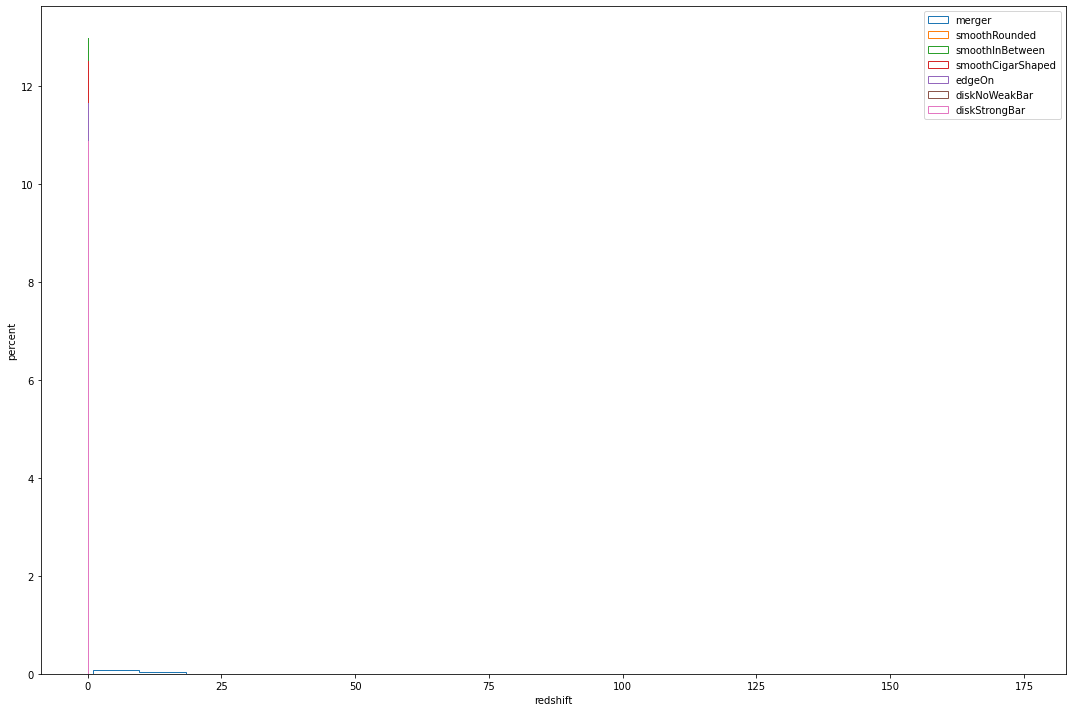

In [27]:
plt.figure(figsize=(15, 10))
plt.hist(merger.petro_theta, histtype="step", label = "merger", bins=20,density=True)
plt.hist(smoothRounded.redshift, histtype="step", label = "smoothRounded", bins=20,density=True)
plt.hist(smoothInBetween.redshift, histtype="step", label = "smoothInBetween", bins=20,density=True)
plt.hist(smoothCigarShaped.redshift, histtype="step", label = "smoothCigarShaped", bins=20,density=True)
plt.hist(edgeOn.redshift, histtype="step", label = "edgeOn", bins=20,density=True)
plt.hist(diskNoWeakBar.redshift, histtype="step", label = "diskNoWeakBar", bins=20,density=True)
plt.hist(diskStrongBar.redshift, histtype="step", label = "diskStrongBar", bins=20,density=True)
plt.xlabel("redshift")
plt.ylabel("percent")
plt.legend(loc="best")
plt.tight_layout()

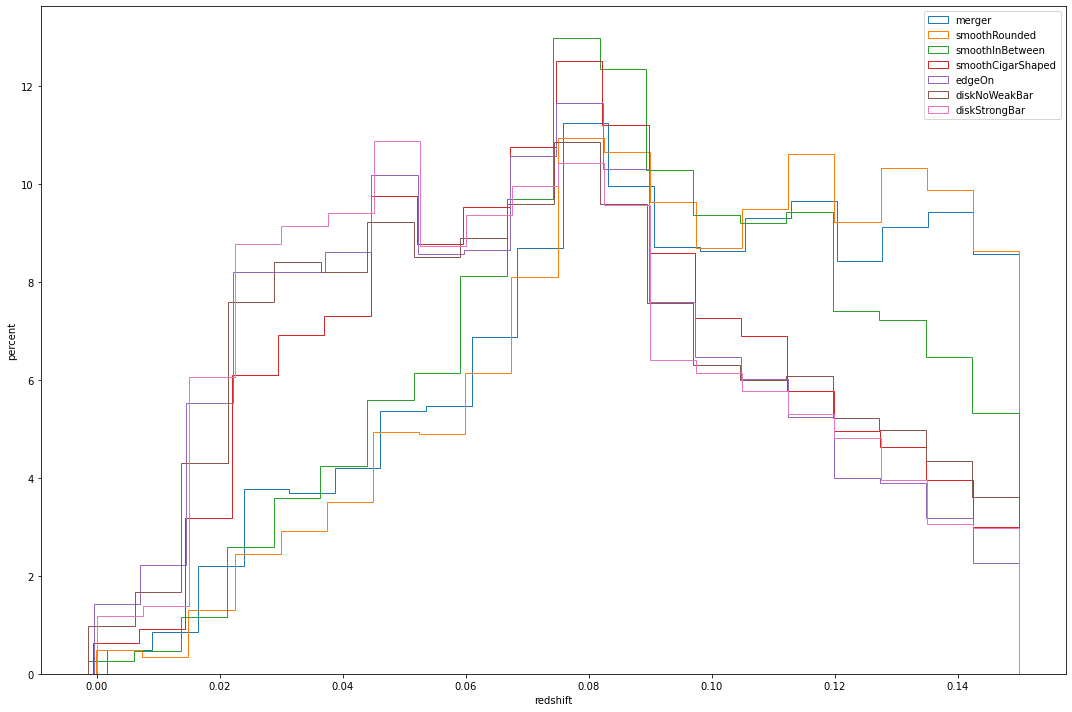

In [18]:
plt.figure(figsize=(15, 10))
plt.hist(merger.redshift, histtype="step", label = "merger", bins=20,density=True)
plt.hist(smoothRounded.redshift, histtype="step", label = "smoothRounded", bins=20,density=True)
plt.hist(smoothInBetween.redshift, histtype="step", label = "smoothInBetween", bins=20,density=True)
plt.hist(smoothCigarShaped.redshift, histtype="step", label = "smoothCigarShaped", bins=20,density=True)
plt.hist(edgeOn.redshift, histtype="step", label = "edgeOn", bins=20,density=True)
plt.hist(diskNoWeakBar.redshift, histtype="step", label = "diskNoWeakBar", bins=20,density=True)
plt.hist(diskStrongBar.redshift, histtype="step", label = "diskStrongBar", bins=20,density=True)
plt.xlabel("redshift")
plt.ylabel("percent")
plt.legend(loc="best")
plt.tight_layout()

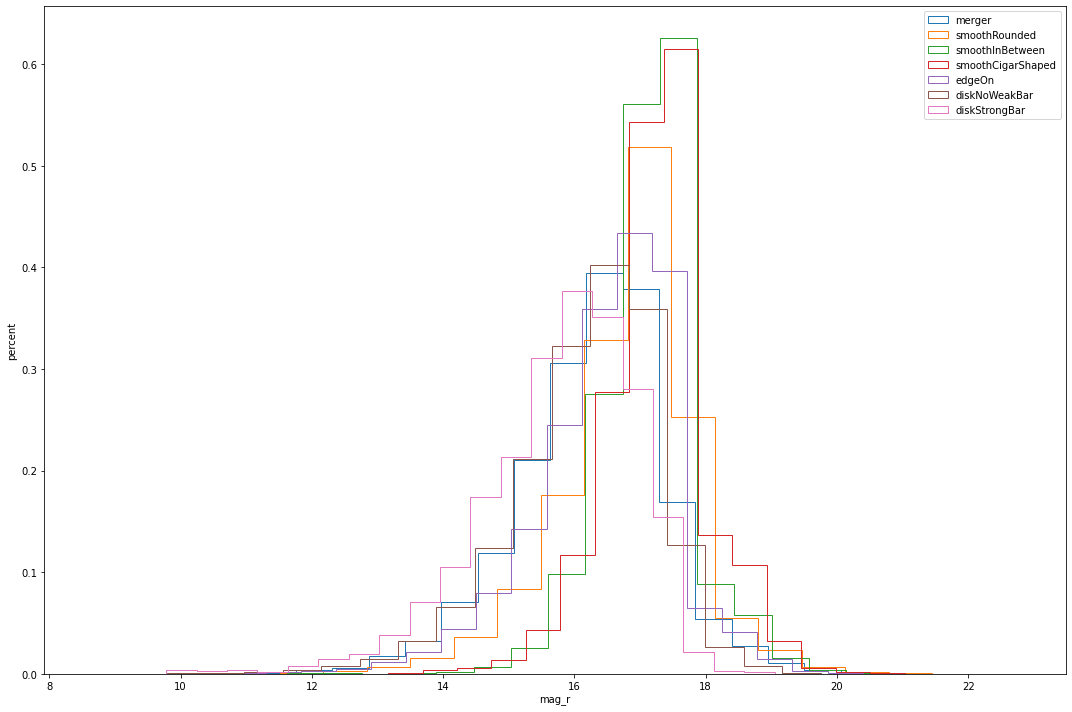

In [19]:
import numpy as np
plt.figure(figsize=(15, 10))
plt.hist(merger.mag_r, histtype="step", label = "merger", bins=20,density=True)
plt.hist(smoothRounded.mag_r, histtype="step", label = "smoothRounded", bins=20,density=True)
plt.hist(smoothInBetween.mag_r, histtype="step", label = "smoothInBetween", bins=20,density=True)
plt.hist(smoothCigarShaped.mag_r, histtype="step", label = "smoothCigarShaped", bins=20,density=True)
plt.hist(edgeOn.mag_r, histtype="step", label = "edgeOn", bins=20,density=True)
diskNoWeakBar_plot = diskNoWeakBar.replace([np.inf, -np.inf], np.nan)
plt.hist(diskNoWeakBar_plot.mag_r, histtype="step", label = "diskNoWeakBar", bins=20,density=True)
plt.hist(diskStrongBar.mag_r, histtype="step", label = "diskStrongBar", bins=20,density=True)
plt.xlabel("mag_r")
plt.ylabel("percent")
plt.legend(loc="best")
plt.tight_layout()

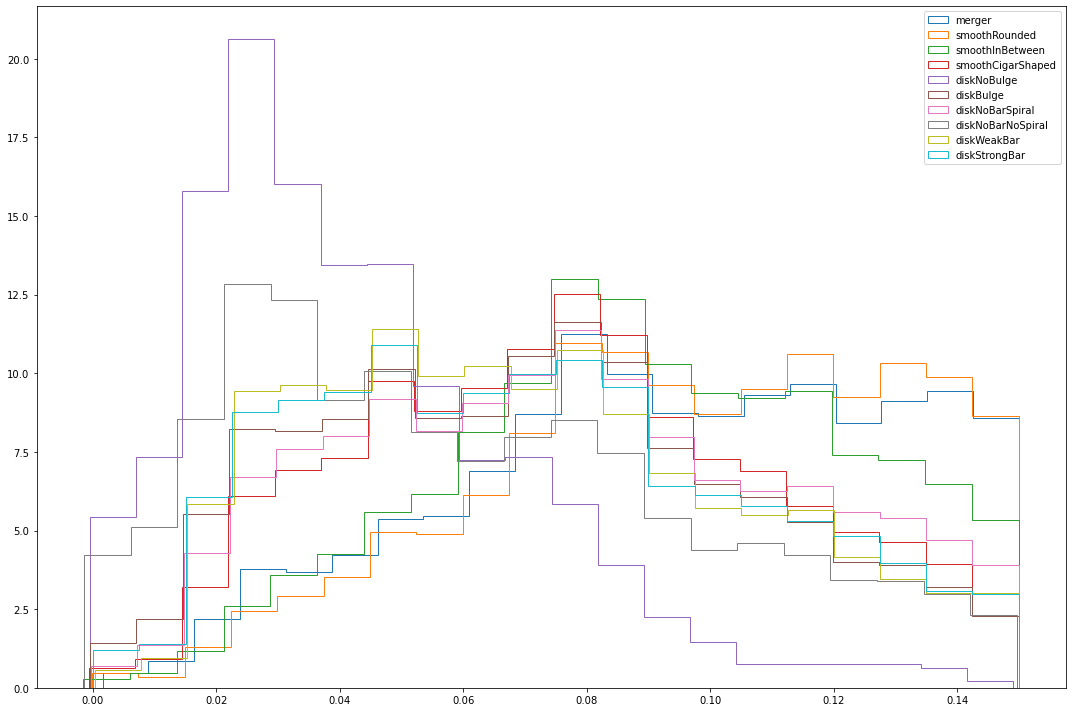

In [20]:
plt.figure(figsize=(15, 10))
plt.hist(merger.redshift, histtype="step", label = "merger", bins=20,density=True)
plt.hist(smoothRounded.redshift, histtype="step", label = "smoothRounded", bins=20,density=True)
plt.hist(smoothInBetween.redshift, histtype="step", label = "smoothInBetween", bins=20,density=True)
plt.hist(smoothCigarShaped.redshift, histtype="step", label = "smoothCigarShaped", bins=20,density=True)
plt.hist(diskNoBulge.redshift, histtype="step", label = "diskNoBulge", bins=20,density=True)
plt.hist(diskBulge.redshift, histtype="step", label = "diskBulge", bins=20,density=True)
plt.hist(diskNoBarSpiral.redshift, histtype="step", label = "diskNoBarSpiral", bins=20,density=True)
plt.hist(diskNoBarNoSpiral.redshift, histtype="step", label = "diskNoBarNoSpiral", bins=20,density=True)
plt.hist(diskWeakBar.redshift, histtype="step", label = "diskWeakBar", bins=20,density=True)
plt.hist(diskStrongBar.redshift, histtype="step", label = "diskStrongBar", bins=20,density=True)
plt.legend(loc="best")
plt.tight_layout()

ValueError: supplied range of [8.627034187316895, inf] is not finite

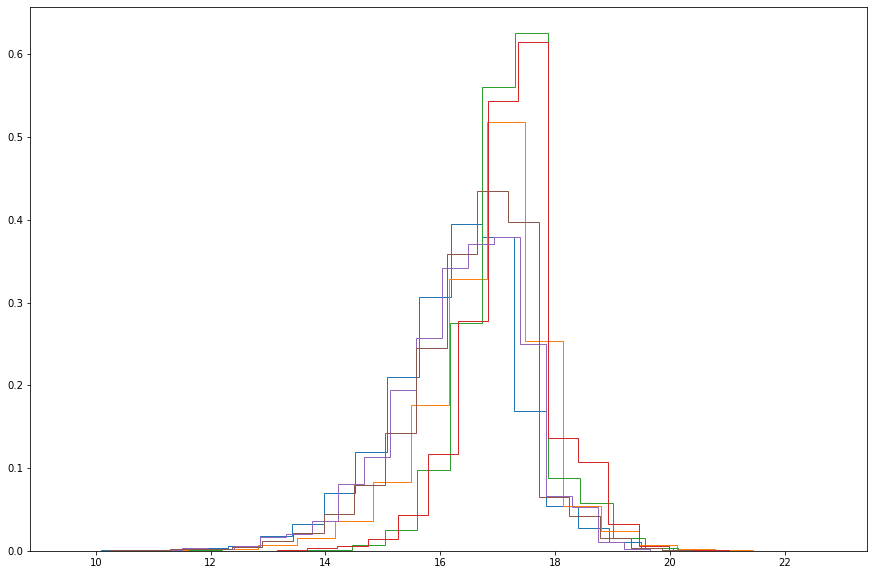

In [21]:
plt.figure(figsize=(15, 10))
plt.hist(merger.mag_r, histtype="step", label = "merger", bins=20,density=True)
plt.hist(smoothRounded.mag_r, histtype="step", label = "smoothRounded", bins=20,density=True)
plt.hist(smoothInBetween.mag_r, histtype="step", label = "smoothInBetween", bins=20,density=True)
plt.hist(smoothCigarShaped.mag_r, histtype="step", label = "smoothCigarShaped", bins=20,density=True)
plt.hist(diskNoBulge.mag_r, histtype="step", label = "diskNoBulge", bins=20,density=True)
plt.hist(diskBulge.mag_r, histtype="step", label = "diskBulge", bins=20,density=True)
plt.hist(diskNoBarSpiral.mag_r, histtype="step", label = "diskNoBarSpiral", bins=20,density=True)
plt.hist(diskNoBarNoSpiral.mag_r, histtype="step", label = "diskNoBarNoSpiral", bins=20,density=True)
plt.hist(diskWeakBar.mag_r, histtype="step", label = "diskWeakBar", bins=20,density=True)
plt.hist(diskStrongBar.mag_r, histtype="step", label = "diskStrongBar", bins=20,density=True)
plt.legend(loc="best")
plt.tight_layout()

## 上面就完成了匹配和分析，下面将fits赚到新的文件夹里

In [57]:
import csv
from tqdm import tqdm
def save_new_csv(galaxy_list: pd.DataFrame, label: str):
    signal = ["merger", "diskNoBulge", "diskNoBarNoSpiral", "diskWeakBar", "diskStrongBar"]
    for i in tqdm(range(len(galaxy_list))):
        temp = []
        temp.append(galaxy_list.iloc[i,2])
        temp.append(galaxy_list.iloc[i,0])
        temp.append(galaxy_list.iloc[i,1])
        temp.append(galaxy_list.iloc[i,8])
        if label in signal:
            temp.append("True")
        else:
            temp.append("False")
        src_path = "/data/renhaoye/Decals/fits/" + str(galaxy_list.iloc[i,0]) + "_" + str(galaxy_list.iloc[i,1]) + ".fits"
        dst_path = "/data/renhaoye/Decals/dataset_auto/train/"
        temp.append(src_path)
        os.system("cp %s %s")
        temp.append(label)
        writer.writerow(temp)
with open("/data/renhaoye/Decals/label_auto_beforeAugmentation.csv", "w") as w:
    writer = csv.writer(w)
    writer.writerow(["iauname", "ra", "dec", "redshift", "agtn", "loc", "label"])
    save_new_csv(merger, "0")
    save_new_csv(smoothRounded, "1")
    save_new_csv(smoothInBetween, "2")
    save_new_csv(smoothCigarShaped, "3")
    save_new_csv(diskNoBulge, "4")
    save_new_csv(diskBulge, "5")
    save_new_csv(diskNoBarSpiral, "6")
    save_new_csv(diskNoBarNoSpiral, "7")
    save_new_csv(diskWeakBar, "8")
    save_new_csv(diskStrongBar, "9")

100%|█████████████████████████████████████| 4042/4042 [00:00<00:00, 5913.77it/s]


### dataset

In [15]:
len(df_auto)

313787

In [ ]:
file = pd.read_csv("/data/renhaoye/Decals/label_auto_beforeAugmentation.csv")
file.head()

### check dataset_auto info

In [30]:
dataset_path = "/data/renhaoye/decals_2022/dataset_auto/"
def wash(dir: list):
    output = []
    for i in range(len(dir)):
        output.append([float(dir[i].split("_")[0]), float(dir[i].split("_")[1].split(".fits")[0])])
    return pd.DataFrame(output, columns=["ra", "dec"])
merger_train = pd.merge(wash(os.listdir(dataset_path + "trainingSet/" + "0/")).drop_duplicates(), merger, how="inner")
smoothRounded_train = pd.merge(wash(os.listdir(dataset_path + "trainingSet/" + "1/")).drop_duplicates(), smoothRounded, how="inner")
smoothInBetween_train = pd.merge(wash(os.listdir(dataset_path + "trainingSet/" + "2/")).drop_duplicates(), smoothInBetween, how="inner")
smoothCigarShaped_train = pd.merge(wash(os.listdir(dataset_path + "trainingSet/" + "3/")).drop_duplicates(), smoothCigarShaped, how="inner")
diskNoBulge_train = pd.merge(wash(os.listdir(dataset_path + "trainingSet/" + "4/")).drop_duplicates(), diskNoBulge, how="inner")
diskBulge_train = pd.merge(wash(os.listdir(dataset_path + "trainingSet/" + "5/")).drop_duplicates(), diskBulge, how="inner")
diskNoBarSpiral_train = pd.merge(wash(os.listdir(dataset_path + "trainingSet/" + "6/")).drop_duplicates(), diskNoBarSpiral, how="inner")
diskNoBarNoSpiral_train = pd.merge(wash(os.listdir(dataset_path + "trainingSet/" + "7/")).drop_duplicates(), diskNoBarNoSpiral, how="inner")
diskWeakBar_train = pd.merge(wash(os.listdir(dataset_path + "trainingSet/" + "8/")).drop_duplicates(), diskWeakBar, how="inner")
diskStrongBar_train = pd.merge(wash(os.listdir(dataset_path + "trainingSet/" + "9/")).drop_duplicates(), diskStrongBar, how="inner")

merger_test = pd.merge(wash(os.listdir(dataset_path + "testSet/" + "0/")).drop_duplicates(), merger, how="inner")
smoothRounded_test = pd.merge(wash(os.listdir(dataset_path + "testSet/" + "1/")).drop_duplicates(), smoothRounded, how="inner")
smoothInBetween_test = pd.merge(wash(os.listdir(dataset_path + "testSet/" + "2/")).drop_duplicates(), smoothInBetween, how="inner")
smoothCigarShaped_test = pd.merge(wash(os.listdir(dataset_path + "testSet/" + "3/")).drop_duplicates(), smoothCigarShaped, how="inner")
diskNoBulge_test = pd.merge(wash(os.listdir(dataset_path + "testSet/" + "4/")).drop_duplicates(), diskNoBulge, how="inner")
diskBulge_test = pd.merge(wash(os.listdir(dataset_path + "testSet/" + "5/")).drop_duplicates(), diskBulge, how="inner")
diskNoBarSpiral_test = pd.merge(wash(os.listdir(dataset_path + "testSet/" + "6/")).drop_duplicates(), diskNoBarSpiral, how="inner")
diskNoBarNoSpiral_test = pd.merge(wash(os.listdir(dataset_path + "testSet/" + "7/")).drop_duplicates(), diskNoBarNoSpiral, how="inner")
diskWeakBar_test = pd.merge(wash(os.listdir(dataset_path + "testSet/" + "8/")).drop_duplicates(), diskWeakBar, how="inner")
diskStrongBar_test = pd.merge(wash(os.listdir(dataset_path + "testSet/" + "9/")).drop_duplicates(), diskStrongBar, how="inner")

merger_valid = pd.merge(wash(os.listdir(dataset_path + "validationSet/" + "0/")).drop_duplicates(), merger, how="inner")
smoothRounded_valid = pd.merge(wash(os.listdir(dataset_path + "validationSet/" + "1/")).drop_duplicates(), smoothRounded, how="inner")
smoothInBetween_valid = pd.merge(wash(os.listdir(dataset_path + "validationSet/" + "2/")).drop_duplicates(), smoothInBetween, how="inner")
smoothCigarShaped_valid = pd.merge(wash(os.listdir(dataset_path + "validationSet/" + "3/")).drop_duplicates(), smoothCigarShaped, how="inner")
diskNoBulge_valid = pd.merge(wash(os.listdir(dataset_path + "validationSet/" + "4/")).drop_duplicates(), diskNoBulge, how="inner")
diskBulge_valid = pd.merge(wash(os.listdir(dataset_path + "validationSet/" + "5/")).drop_duplicates(), diskBulge, how="inner")
diskNoBarSpiral_valid = pd.merge(wash(os.listdir(dataset_path + "validationSet/" + "6/")).drop_duplicates(), diskNoBarSpiral, how="inner")
diskNoBarNoSpiral_valid = pd.merge(wash(os.listdir(dataset_path + "validationSet/" + "7/")).drop_duplicates(), diskNoBarNoSpiral, how="inner")
diskWeakBar_valid = pd.merge(wash(os.listdir(dataset_path + "validationSet/" + "8/")).drop_duplicates(), diskWeakBar, how="inner")
diskStrongBar_valid = pd.merge(wash(os.listdir(dataset_path + "validationSet/" + "9/")).drop_duplicates(), diskStrongBar, how="inner")

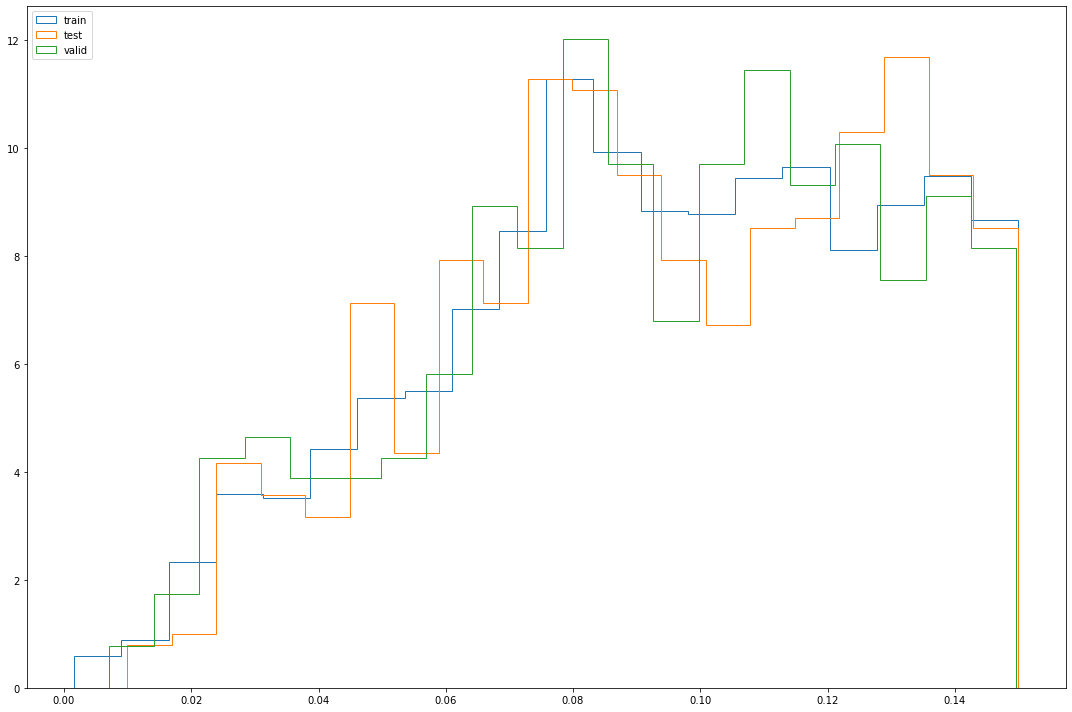

In [31]:
plt.figure(figsize=(15, 10))
plt.hist(merger_train.redshift, histtype="step", label = "train", bins=20,density=True)
plt.hist(merger_test.redshift, histtype="step", label = "test", bins=20,density=True)
plt.hist(merger_valid.redshift, histtype="step", label = "valid", bins=20,density=True)
plt.legend(loc="best")
plt.tight_layout()

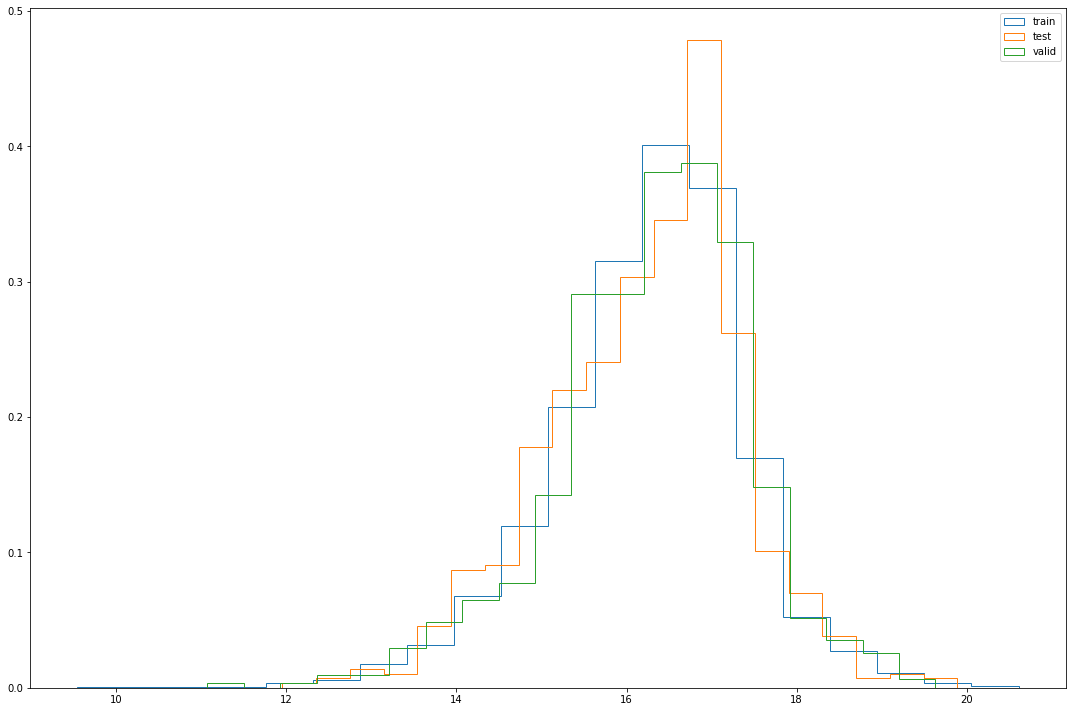

In [41]:
plt.figure(figsize=(15, 10))
plt.hist(merger_train.mag_r, histtype="step", label = "train", bins=20,density=True)
plt.hist(merger_test.mag_r, histtype="step", label = "test", bins=20,density=True)
plt.hist(merger_valid.mag_r, histtype="step", label = "valid", bins=20,density=True)
plt.legend(loc="best")
plt.tight_layout()

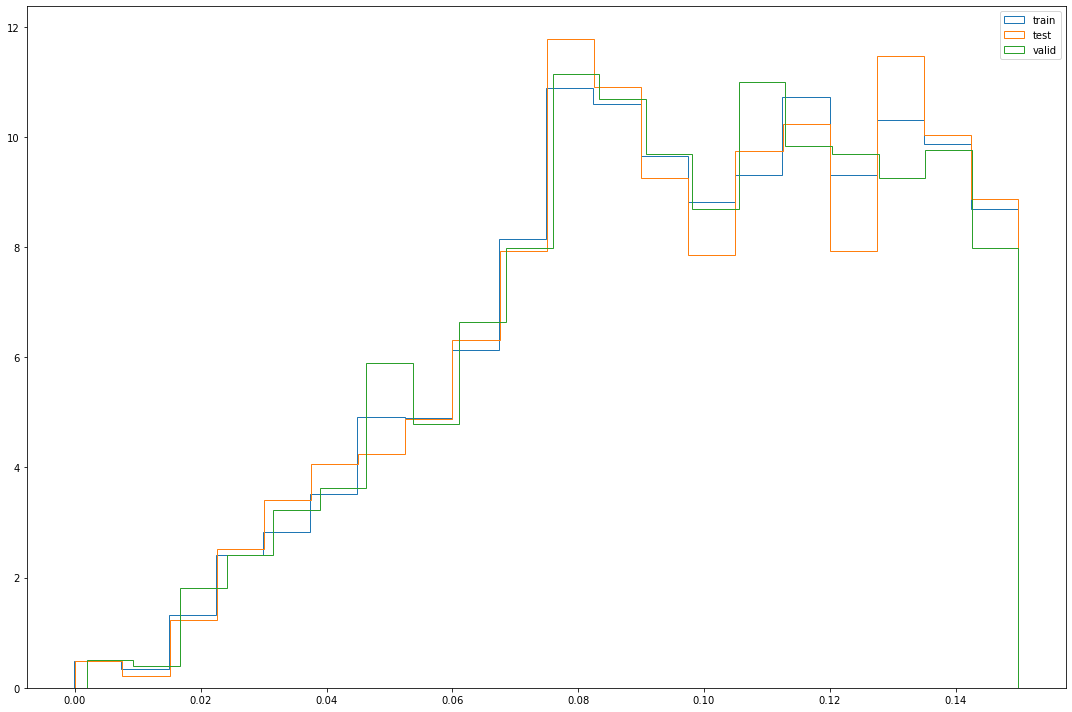

In [32]:
plt.figure(figsize=(15, 10))
plt.hist(smoothRounded_train.redshift, histtype="step", label = "train", bins=20,density=True)
plt.hist(smoothRounded_test.redshift, histtype="step", label = "test", bins=20,density=True)
plt.hist(smoothRounded_valid.redshift, histtype="step", label = "valid", bins=20,density=True)
plt.legend(loc="best")
plt.tight_layout()

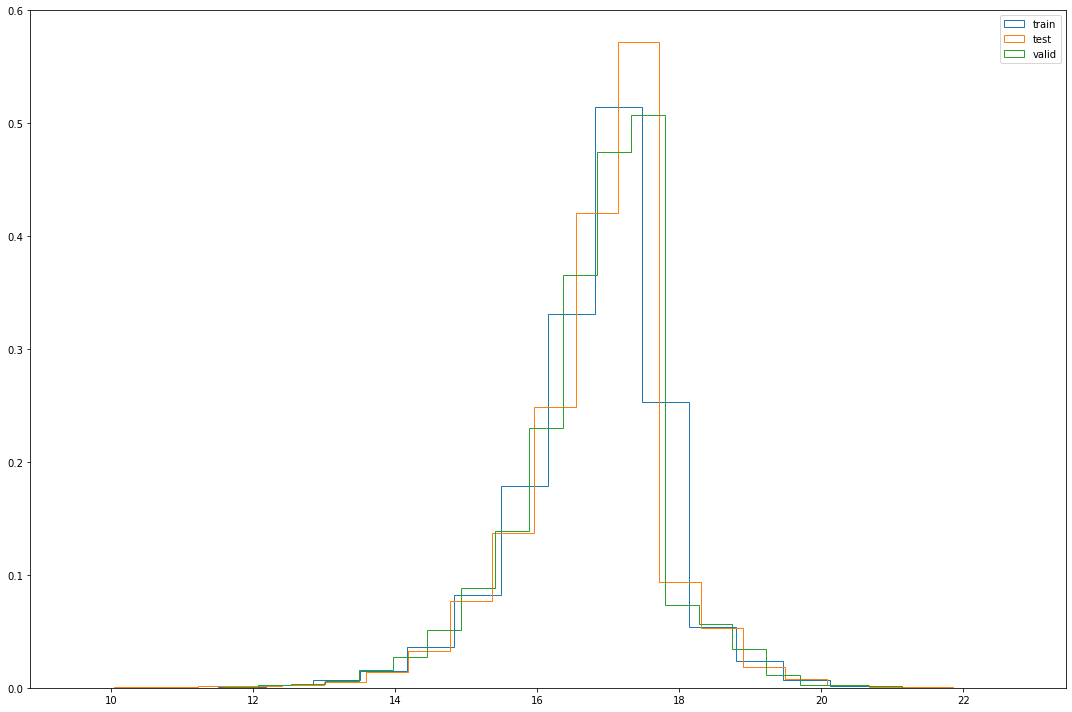

In [42]:
plt.figure(figsize=(15, 10))
plt.hist(smoothRounded_train.mag_r, histtype="step", label = "train", bins=20,density=True)
plt.hist(smoothRounded_test.mag_r, histtype="step", label = "test", bins=20,density=True)
plt.hist(smoothRounded_valid.mag_r, histtype="step", label = "valid", bins=20,density=True)
plt.legend(loc="best")
plt.tight_layout()

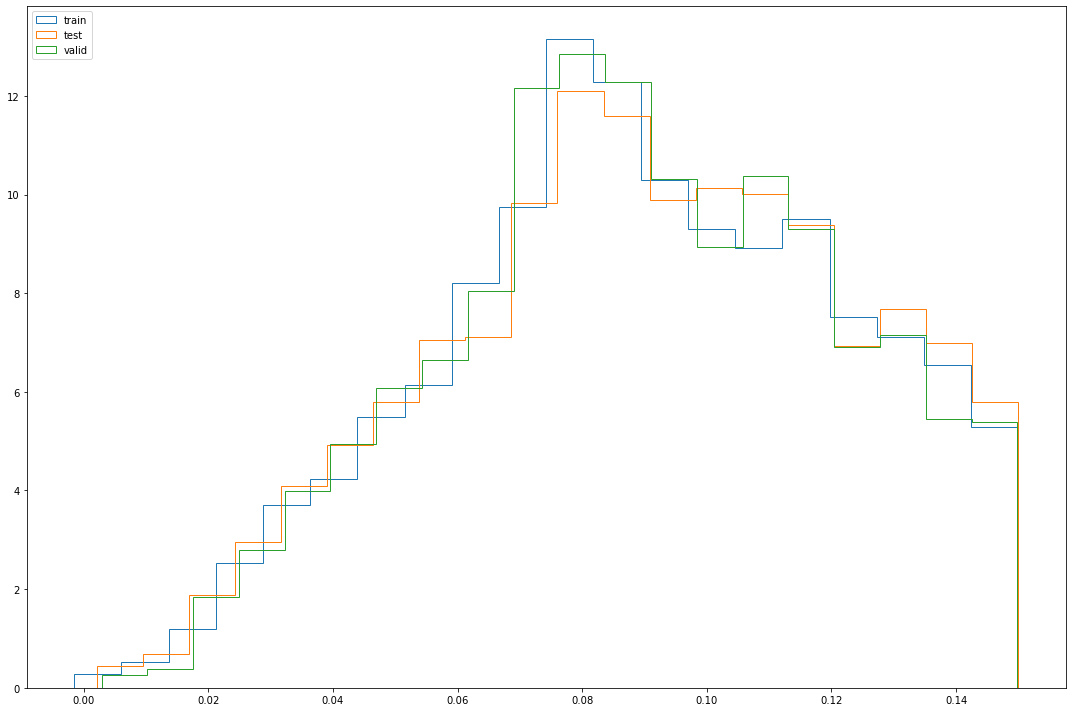

In [33]:
plt.figure(figsize=(15, 10))
plt.hist(smoothInBetween_train.redshift, histtype="step", label = "train", bins=20,density=True)
plt.hist(smoothInBetween_test.redshift, histtype="step", label = "test", bins=20,density=True)
plt.hist(smoothInBetween_valid.redshift, histtype="step", label = "valid", bins=20,density=True)
plt.legend(loc="best")
plt.tight_layout()

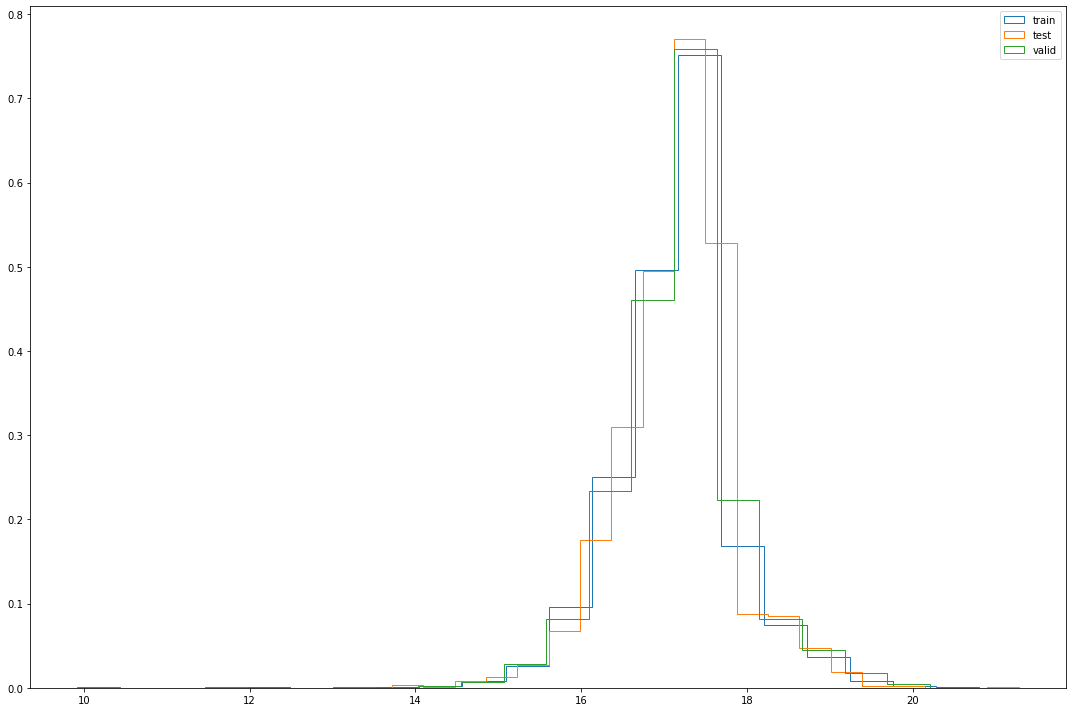

In [43]:
plt.figure(figsize=(15, 10))
plt.hist(smoothInBetween_train.mag_r, histtype="step", label = "train", bins=20,density=True)
plt.hist(smoothInBetween_test.mag_r, histtype="step", label = "test", bins=20,density=True)
plt.hist(smoothInBetween_valid.mag_r, histtype="step", label = "valid", bins=20,density=True)
plt.legend(loc="best")
plt.tight_layout()

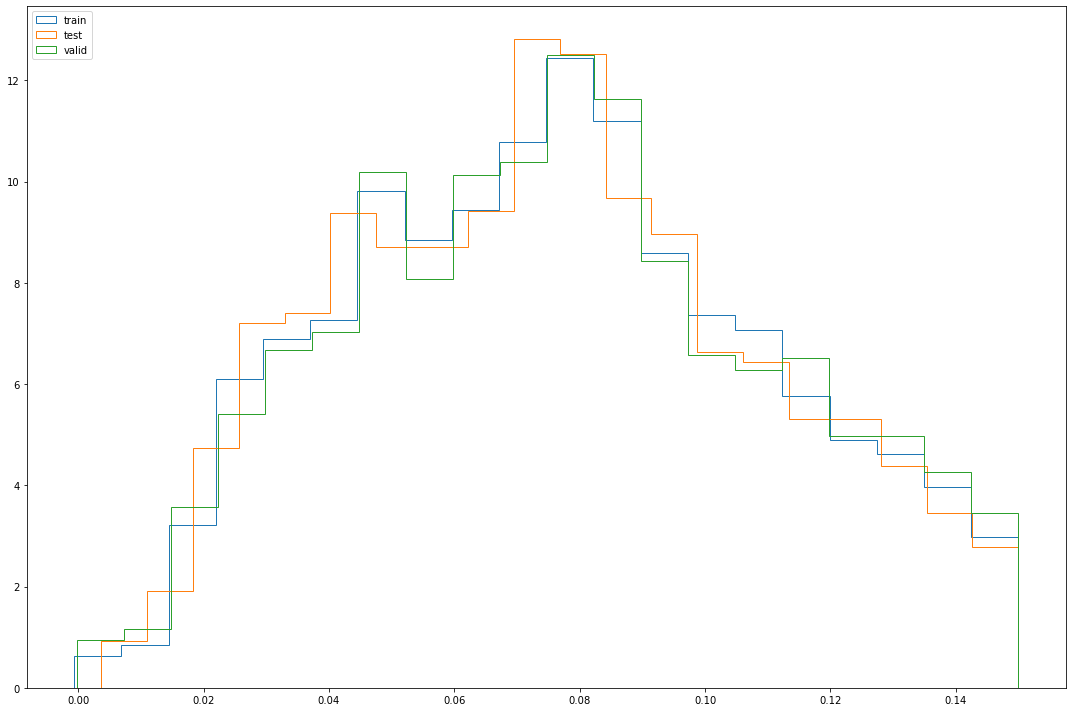

In [34]:
plt.figure(figsize=(15, 10))
plt.hist(smoothCigarShaped_train.redshift, histtype="step", label = "train", bins=20,density=True)
plt.hist(smoothCigarShaped_test.redshift, histtype="step", label = "test", bins=20,density=True)
plt.hist(smoothCigarShaped_valid.redshift, histtype="step", label = "valid", bins=20,density=True)
plt.legend(loc="best")
plt.tight_layout()

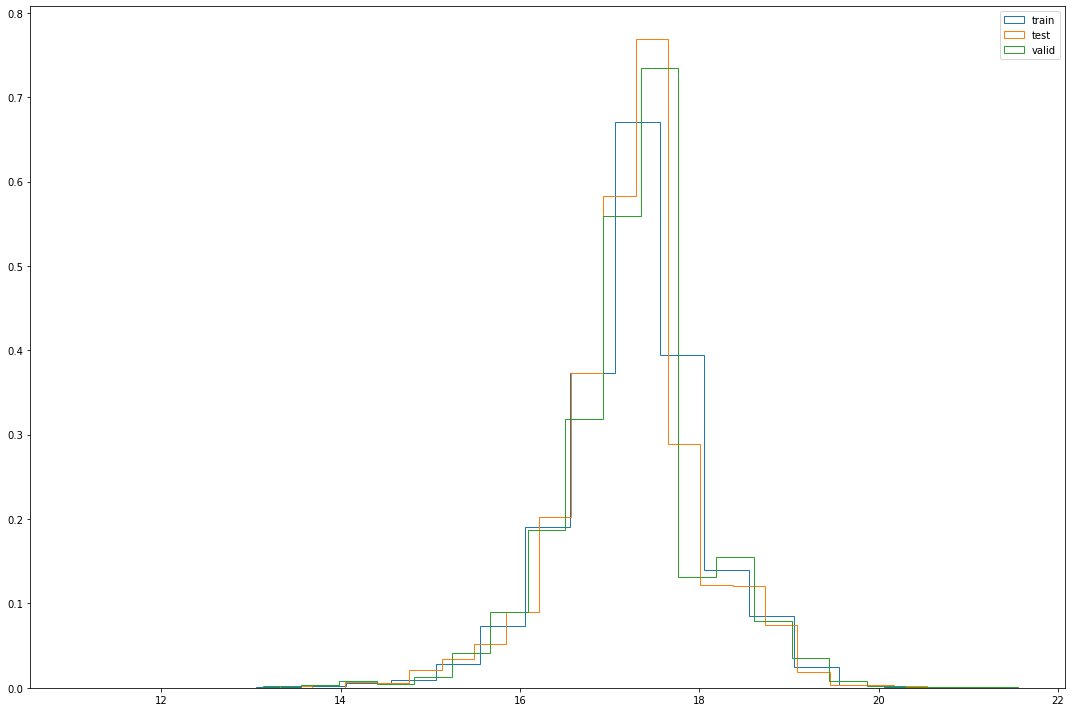

In [44]:
plt.figure(figsize=(15, 10))
plt.hist(smoothCigarShaped_train.mag_r, histtype="step", label = "train", bins=20,density=True)
plt.hist(smoothCigarShaped_test.mag_r, histtype="step", label = "test", bins=20,density=True)
plt.hist(smoothCigarShaped_valid.mag_r, histtype="step", label = "valid", bins=20,density=True)
plt.legend(loc="best")
plt.tight_layout()

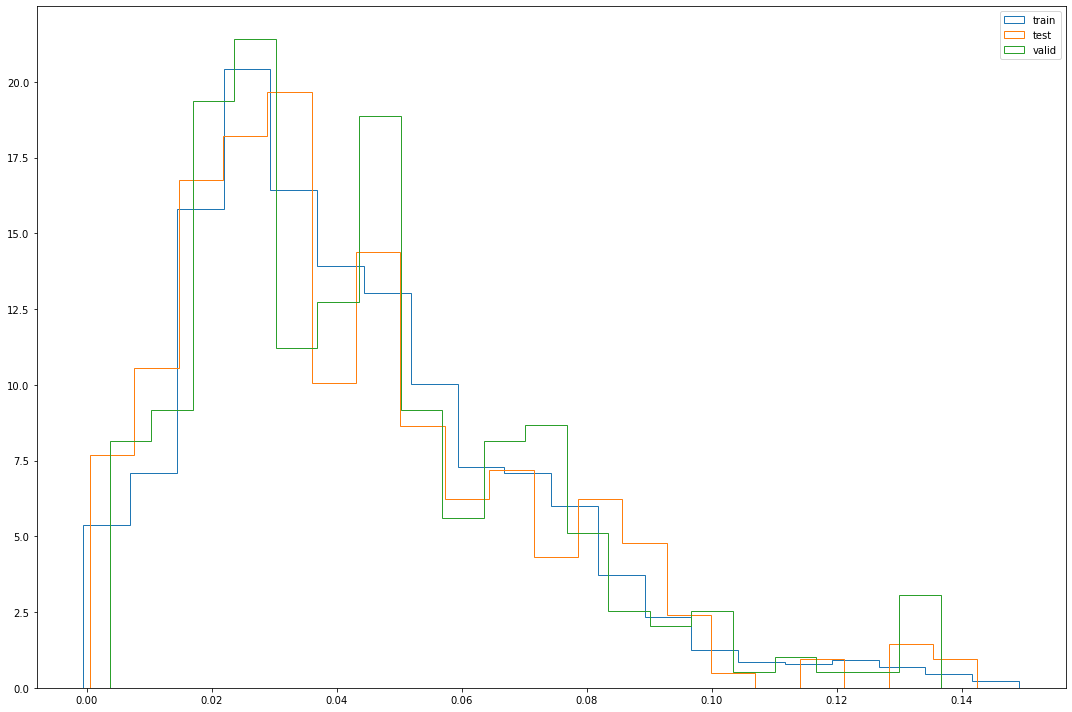

In [45]:
plt.figure(figsize=(15, 10))
plt.hist(diskNoBulge_train.redshift, histtype="step", label = "train", bins=20,density=True)
plt.hist(diskNoBulge_test.redshift, histtype="step", label = "test", bins=20,density=True)
plt.hist(diskNoBulge_valid.redshift, histtype="step", label = "valid", bins=20,density=True)
plt.legend(loc="best")
plt.tight_layout()

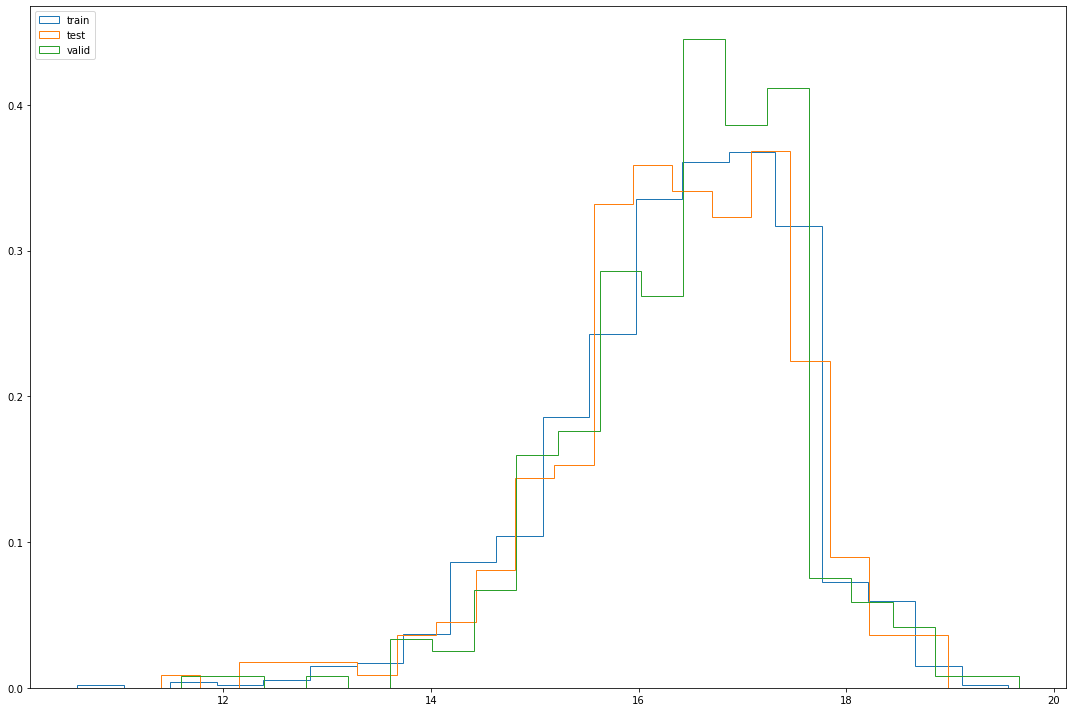

In [46]:
plt.figure(figsize=(15, 10))
plt.hist(diskNoBulge_train.mag_r, histtype="step", label = "train", bins=20,density=True)
plt.hist(diskNoBulge_test.mag_r, histtype="step", label = "test", bins=20,density=True)
plt.hist(diskNoBulge_valid.mag_r, histtype="step", label = "valid", bins=20,density=True)
plt.legend(loc="best")
plt.tight_layout()

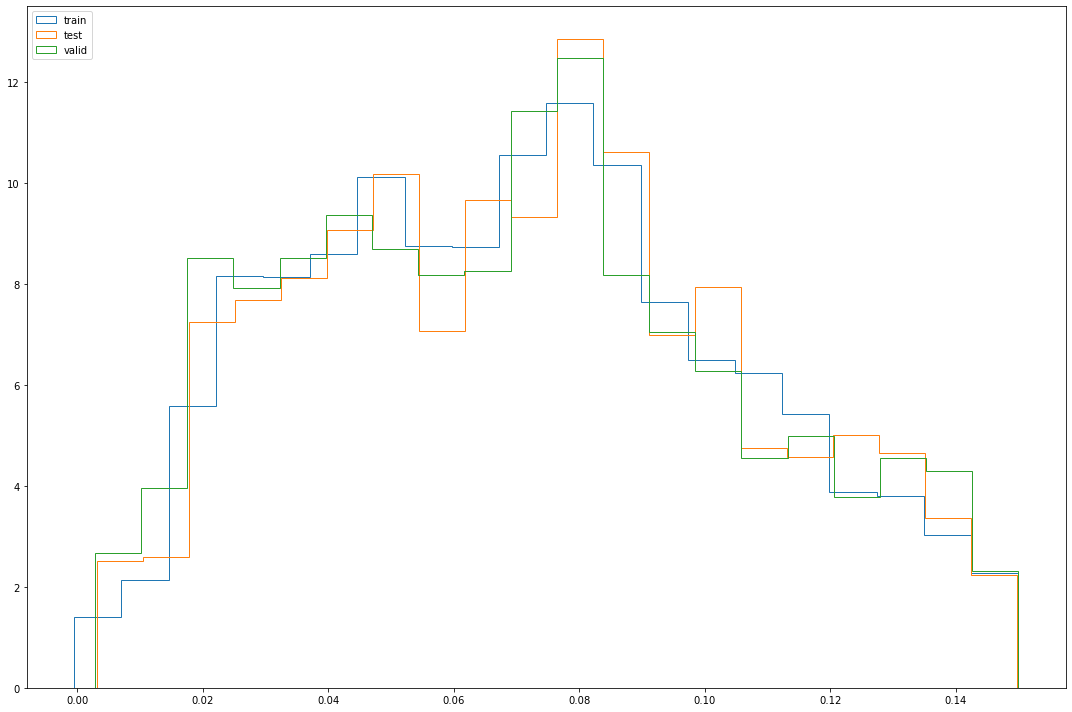

In [47]:
plt.figure(figsize=(15, 10))
plt.hist(diskBulge_train.redshift, histtype="step", label = "train", bins=20,density=True)
plt.hist(diskBulge_test.redshift, histtype="step", label = "test", bins=20,density=True)
plt.hist(diskBulge_valid.redshift, histtype="step", label = "valid", bins=20,density=True)
plt.legend(loc="best")
plt.tight_layout()

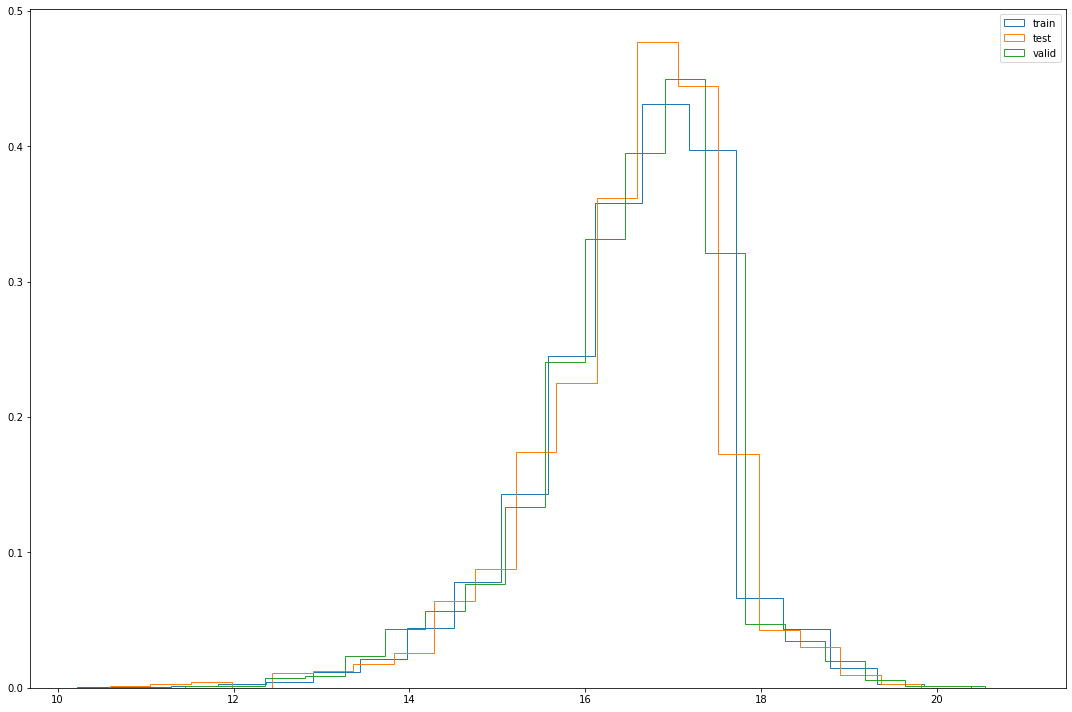

In [48]:
plt.figure(figsize=(15, 10))
plt.hist(diskBulge_train.mag_r, histtype="step", label = "train", bins=20,density=True)
plt.hist(diskBulge_test.mag_r, histtype="step", label = "test", bins=20,density=True)
plt.hist(diskBulge_valid.mag_r, histtype="step", label = "valid", bins=20,density=True)
plt.legend(loc="best")
plt.tight_layout()

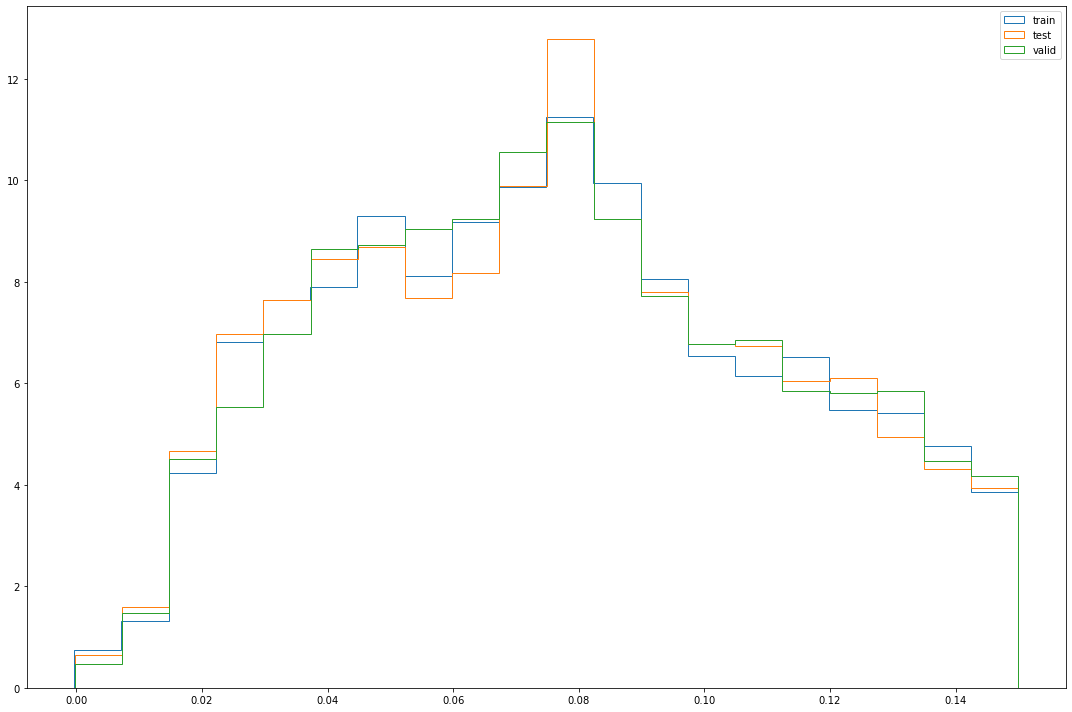

In [49]:
plt.figure(figsize=(15, 10))
plt.hist(diskNoBarSpiral_train.redshift, histtype="step", label = "train", bins=20,density=True)
plt.hist(diskNoBarSpiral_test.redshift, histtype="step", label = "test", bins=20,density=True)
plt.hist(diskNoBarSpiral_valid.redshift, histtype="step", label = "valid", bins=20,density=True)
plt.legend(loc="best")
plt.tight_layout()

ValueError: supplied range of [9.544028282165527, inf] is not finite

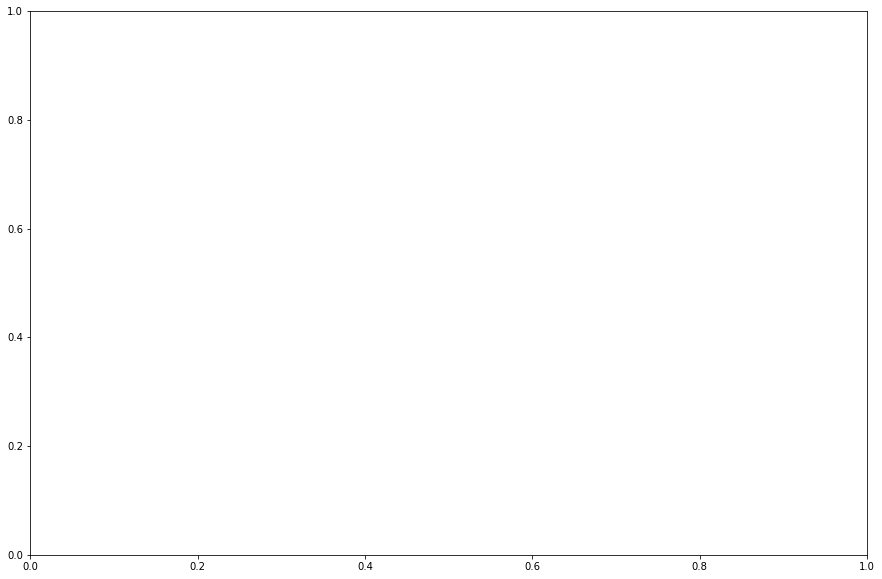

In [57]:
plt.figure(figsize=(15, 10))
plt.hist(diskNoBarSpiral_train.mag_r, histtype="step", label = "train", bins=20,density=True)
plt.hist(diskNoBarSpiral_test.mag_r, histtype="step", label = "test", bins=20,density=True)
plt.hist(diskNoBarSpiral_valid.mag_r, histtype="step", label = "valid", bins=20,density=True)
plt.legend(loc="best")
plt.tight_layout()

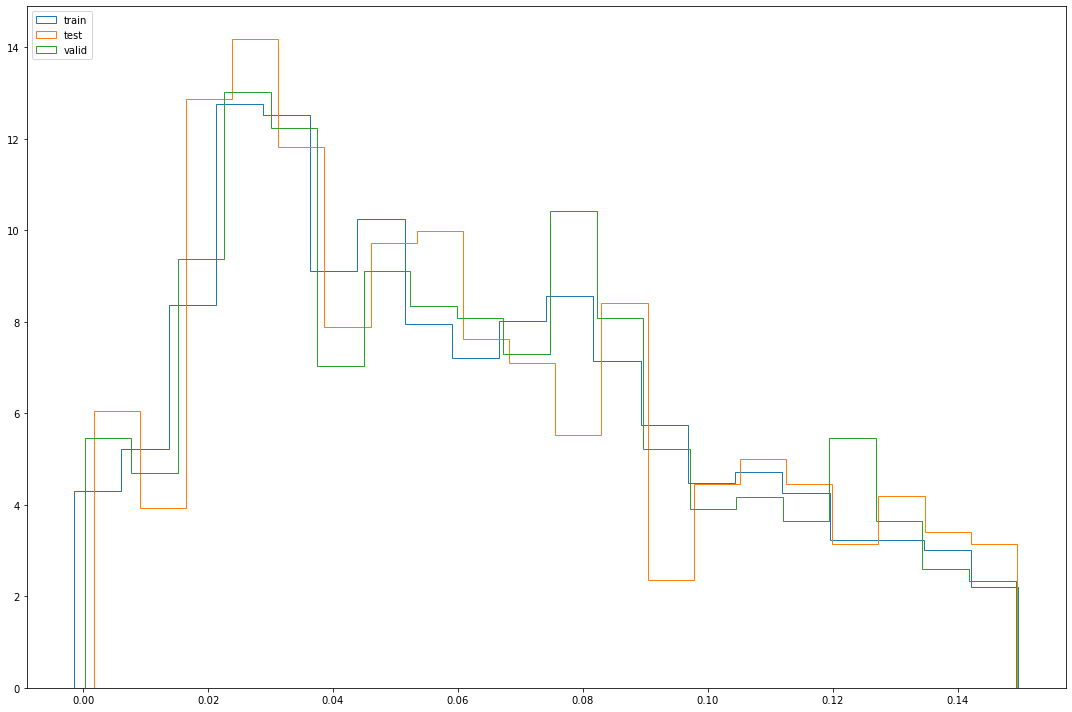

In [51]:
plt.figure(figsize=(15, 10))
plt.hist(diskNoBarNoSpiral_train.redshift, histtype="step", label = "train", bins=20,density=True)
plt.hist(diskNoBarNoSpiral_test.redshift, histtype="step", label = "test", bins=20,density=True)
plt.hist(diskNoBarNoSpiral_valid.redshift, histtype="step", label = "valid", bins=20,density=True)
plt.legend(loc="best")
plt.tight_layout()

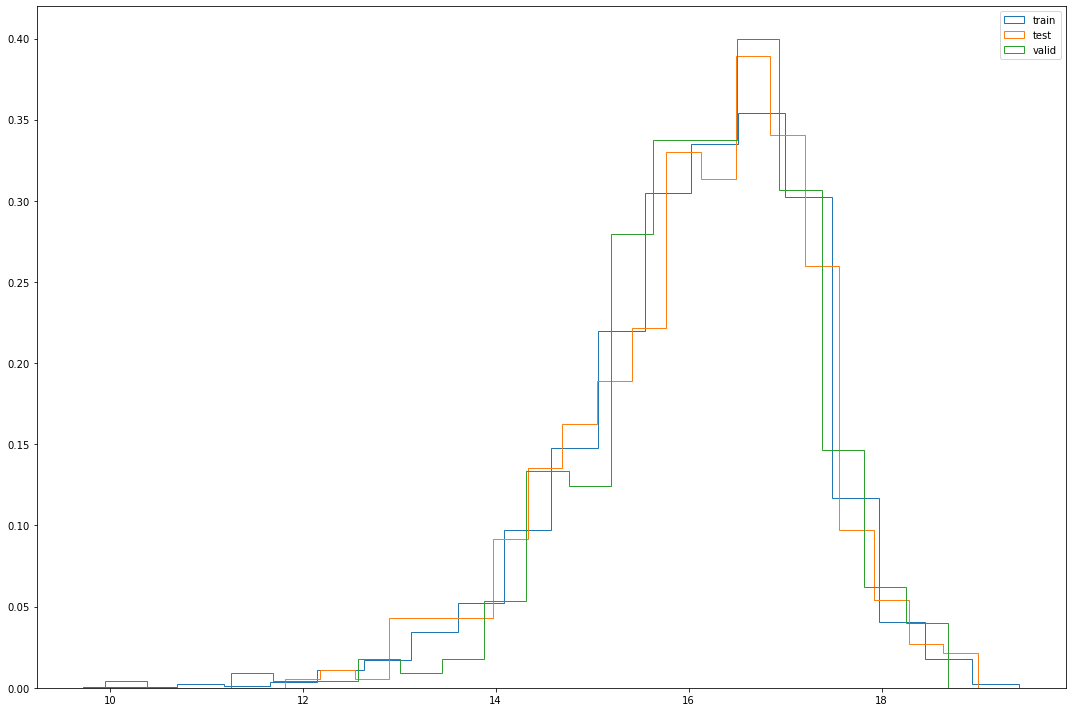

In [52]:
plt.figure(figsize=(15, 10))
plt.hist(diskNoBarNoSpiral_train.mag_r, histtype="step", label = "train", bins=20,density=True)
plt.hist(diskNoBarNoSpiral_test.mag_r, histtype="step", label = "test", bins=20,density=True)
plt.hist(diskNoBarNoSpiral_valid.mag_r, histtype="step", label = "valid", bins=20,density=True)
plt.legend(loc="best")
plt.tight_layout()

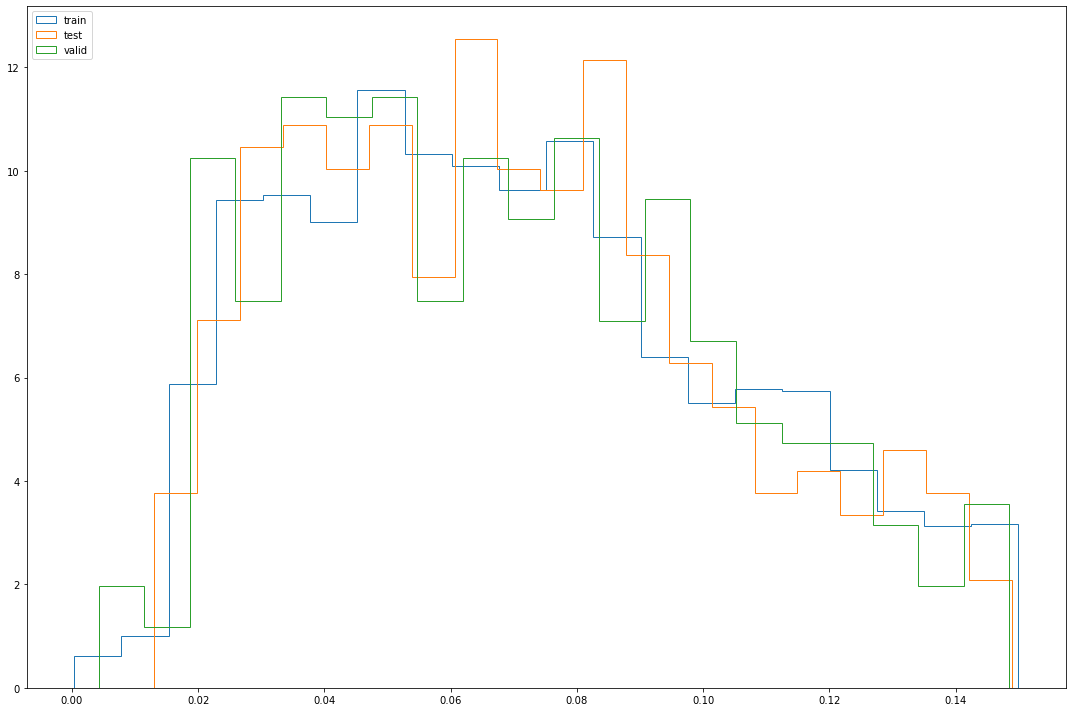

In [53]:
plt.figure(figsize=(15, 10))
plt.hist(diskWeakBar_train.redshift, histtype="step", label = "train", bins=20,density=True)
plt.hist(diskWeakBar_test.redshift, histtype="step", label = "test", bins=20,density=True)
plt.hist(diskWeakBar_valid.redshift, histtype="step", label = "valid", bins=20,density=True)
plt.legend(loc="best")
plt.tight_layout()

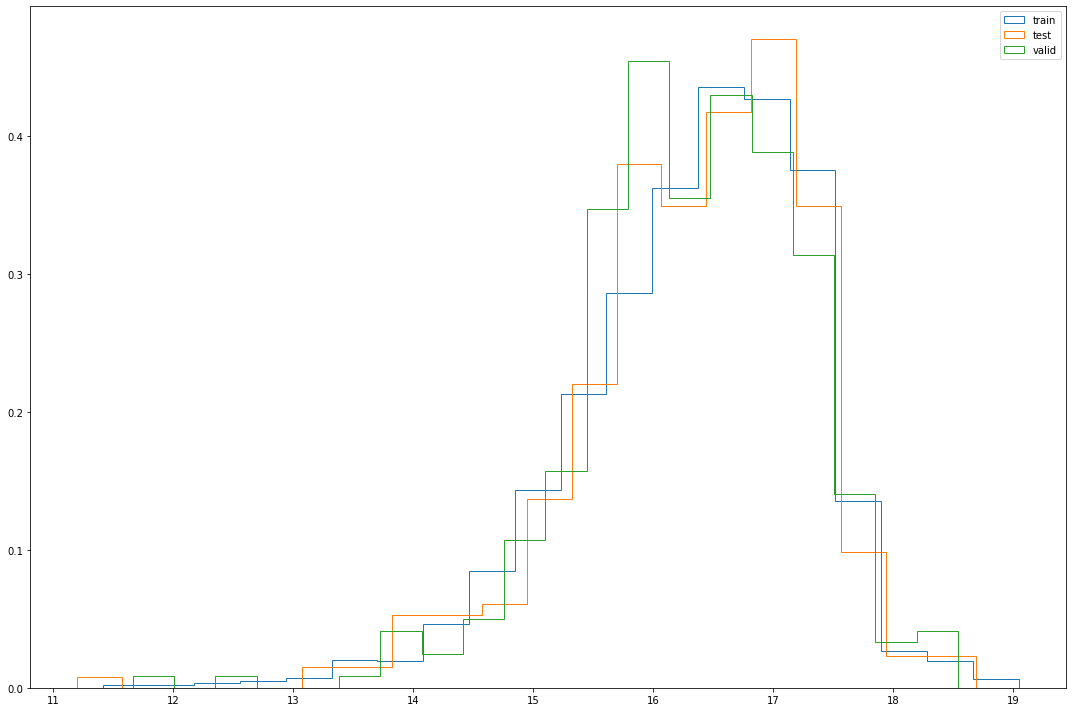

In [54]:
plt.figure(figsize=(15, 10))
plt.hist(diskWeakBar_train.mag_r, histtype="step", label = "train", bins=20,density=True)
plt.hist(diskWeakBar_test.mag_r, histtype="step", label = "test", bins=20,density=True)
plt.hist(diskWeakBar_valid.mag_r, histtype="step", label = "valid", bins=20,density=True)
plt.legend(loc="best")
plt.tight_layout()

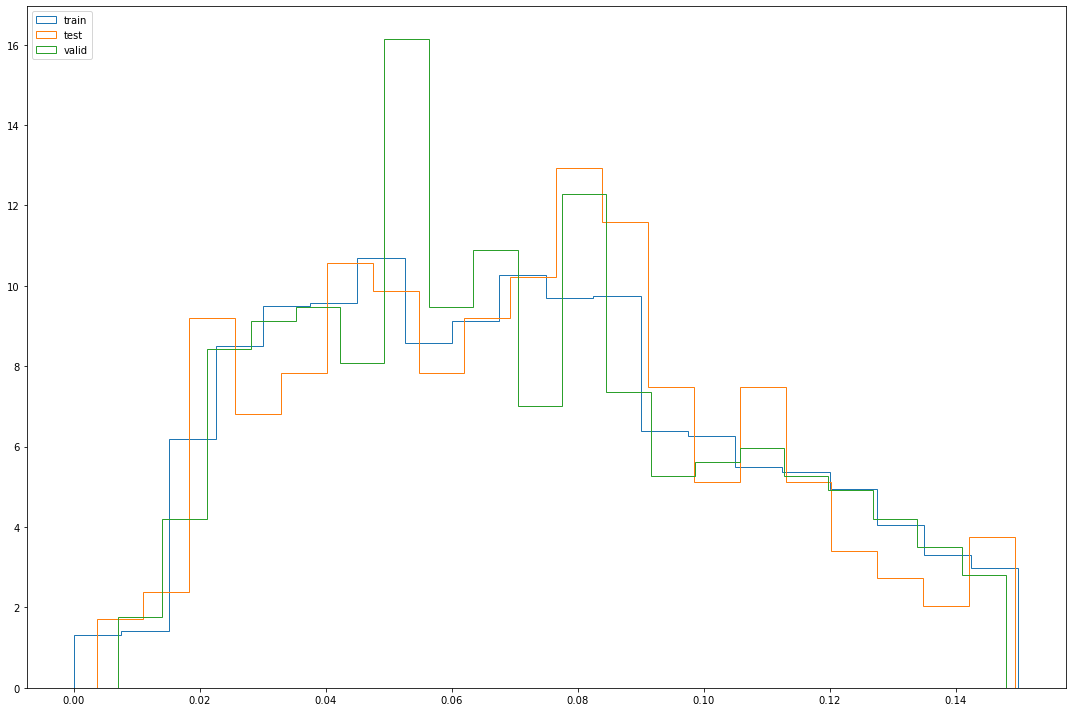

In [55]:
plt.figure(figsize=(15, 10))
plt.hist(diskStrongBar_train.redshift, histtype="step", label = "train", bins=20,density=True)
plt.hist(diskStrongBar_test.redshift, histtype="step", label = "test", bins=20,density=True)
plt.hist(diskStrongBar_valid.redshift, histtype="step", label = "valid", bins=20,density=True)
plt.legend(loc="best")
plt.tight_layout()

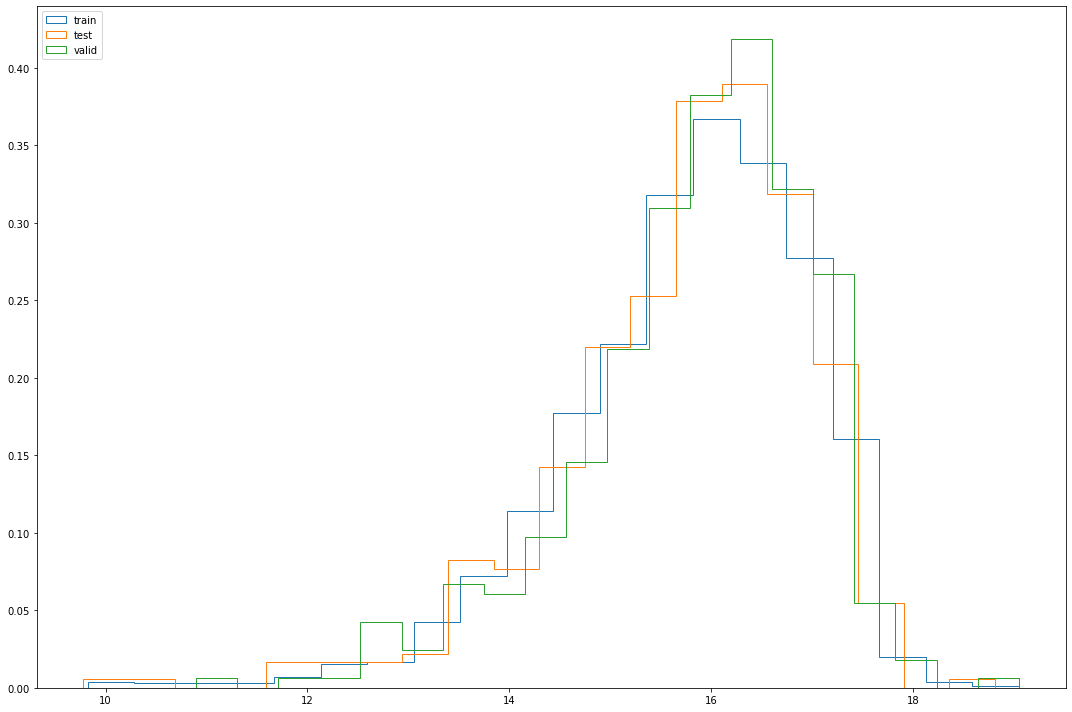

In [56]:
plt.figure(figsize=(15, 10))
plt.hist(diskStrongBar_train.mag_r, histtype="step", label = "train", bins=20,density=True)
plt.hist(diskStrongBar_test.mag_r, histtype="step", label = "test", bins=20,density=True)
plt.hist(diskStrongBar_valid.mag_r, histtype="step", label = "valid", bins=20,density=True)
plt.legend(loc="best")
plt.tight_layout()